## QNLP on a nanophotonic chip

In [1]:
E = ["Alice", "Bob", "Claire", "Dave", "Eve", "Fred"]
R = ["loves", "hates", "kills"]

print("Nouns: {}".format(', '.join(E)))
print("Verbs: {}".format(', '.join(R)))

Nouns: Alice, Bob, Claire, Dave, Eve, Fred
Verbs: loves, hates, kills


108 subject-verb-object sentences:


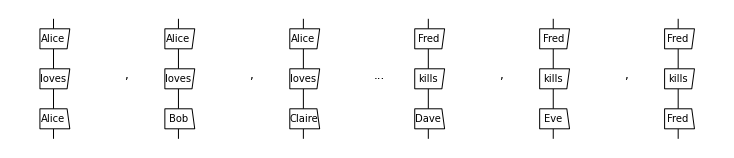

In [2]:
from discopy import Ty, Word, drawing

n = Ty('n')

class SimpleWord(Word):
    """ Word boxes with `dom == cod == n`. """
    def __init__(self, name, dom=n, cod=n, data=None, _dagger=False):
        super().__init__(name, dom=dom, cod=cod, data=data, _dagger=_dagger)

corpus = {
    ' '.join([x, r, y]):
    SimpleWord(x) >> SimpleWord(r) >> SimpleWord(y).dagger()
    for x in E for r in R for y in E}

print("{} subject-verb-object sentences:".format(len(corpus)))
start = drawing.Equation(*list(corpus.values())[:3], symbol=',')
end = drawing.Equation(*list(corpus.values())[-3:], symbol=',')
drawing.equation(start, end, symbol='...', asymmetry=5e-2, figsize=(10, 2), draw_type_labels=False)

In [3]:
import numpy as np; np.random.seed(42)

from discopy.quantum.optics import Id, MZI

def ansatz(params):
    depth, half_width, _ = params.shape
    chip = Id(2 * half_width)
    for i in range(depth):
        chip >>= Id().tensor(*[
                MZI(*params[i, j]) for j in range(half_width)])\
            if not i % 2 else Id(1).tensor(*[
                MZI(*params[i, j]) for j in range(half_width - 1)]) @ Id(1)
    return chip

Ansatz for 'Bob' (16 parameters):


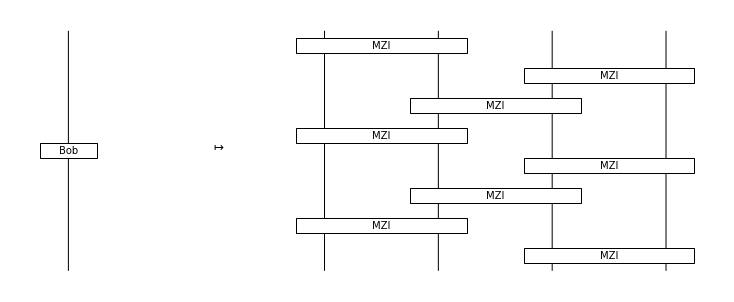

Total: 9 * 16 = 144 parameters.


In [4]:
width, depth = 4, 5

n_params = 2 * (depth * width // 2 - depth // 2)

params0 = 2 * np.pi * np.random.random_sample((len(E + R), depth, width // 2, 2))

print("Ansatz for 'Bob' ({} parameters):".format(n_params))

drawing.equation(
    SimpleWord('Bob'), ansatz(params0[1]),
    draw_type_labels=False, symbol='$\\mapsto$', figsize=(10, 4))

print("Total: {} * {} = {} parameters.".format(len(E + R), n_params, len(E + R) * n_params))

Ansatz for 'Alice loves Bob':


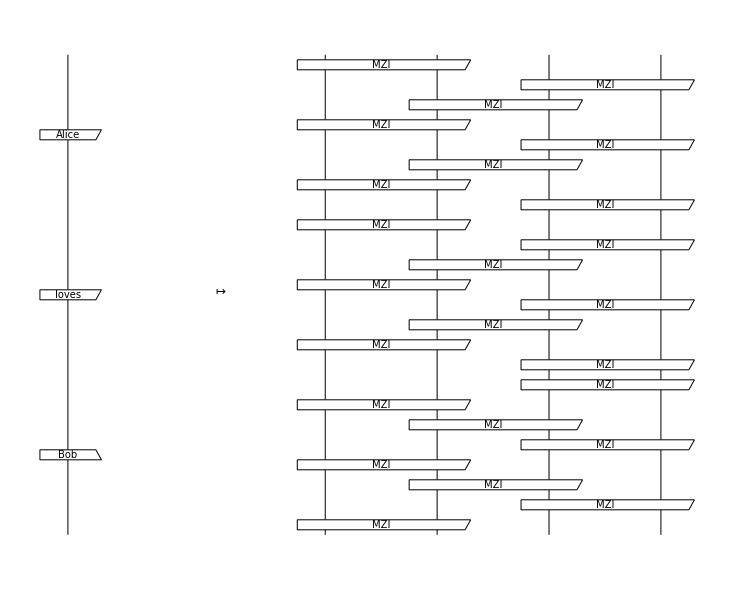

In [5]:
from discopy.quantum.optics import Functor

F = lambda params: Functor(
    ob={n: Ty(1) ** width},
    ar={SimpleWord(w): ansatz(params[i]) for i, w in enumerate(E + R)})

F0 = F(params0)

print("Ansatz for 'Alice loves Bob':")
drawing.equation(
    corpus["Alice loves Bob"], F0(corpus["Alice loves Bob"]),
    symbol='$\\mapsto$', figsize=(10, 8), draw_type_labels=False, asymmetry=5e-2)

In [7]:
n_photons = 2
input_modes = output_modes = [0, 1, 1, 0]

In [8]:
probability = lambda amplitude: np.absolute(amplitude) ** 2

def evaluate(params, sentence):
    return probability(F(params)(corpus[sentence]).amp(n_photons, input_modes, output_modes))

print("Get the scores for each sentence:\n")

for sentence in corpus:
    print("{} : {}".format(sentence, evaluate(params0, sentence)))

Get the scores for each sentence:

Alice loves Alice : 0.1428386691652242
Alice loves Bob : 0.13520091645410592
Alice loves Claire : 0.1956549378689259
Alice loves Dave : 0.0021423052688703233
Alice loves Eve : 0.005314418853193311
Alice loves Fred : 0.10251124135781116
Alice hates Alice : 0.052557650945135745
Alice hates Bob : 0.1816855210058763
Alice hates Claire : 0.24490870330143172
Alice hates Dave : 0.08791143790306051
Alice hates Eve : 0.067953216974125
Alice hates Fred : 0.11101622781129214
Alice kills Alice : 0.09092073005142212
Alice kills Bob : 0.2325171738169394
Alice kills Claire : 0.23730080472102136
Alice kills Dave : 0.0705732194522835
Alice kills Eve : 0.028422512980828346
Alice kills Fred : 0.012386874240822257
Bob loves Alice : 0.01943561246034028
Bob loves Bob : 0.42319045712281017
Bob loves Claire : 0.08238487417708451
Bob loves Dave : 0.05505814334586908
Bob loves Eve : 0.006271312464425485
Bob loves Fred : 0.049090786769914775
Bob hates Alice : 0.0377709799689576